In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv("/mnt/c/users/ankku/downloads/Customers.csv")
products = pd.read_csv("/mnt/c/users/ankku/downloads/products.csv")
transactions = pd.read_csv("/mnt/c/users/ankku/downloads/transactions.csv")

In [5]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [10]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [12]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [13]:
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

Customers: 0
Products: 0
Transactions: 0


In [14]:
merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
if (merged_df['Price_x'] == merged_df['Price_y']).all():
    merged_df = merged_df.drop(columns=['Price_y']).rename(columns={'Price_x': 'Price'})
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


Checking If any <b>Product Sell</b> is exceptionally low or high <br>
Checking if any <b>Product's Price</b> or <b>Generated Revenue</b> is lagging or leading very much compared to others

Quantity: 0 outliers detected


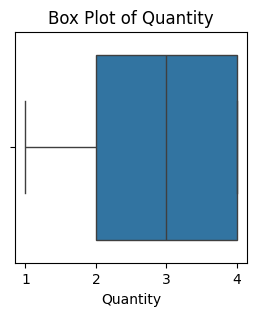

TotalValue: 0 outliers detected


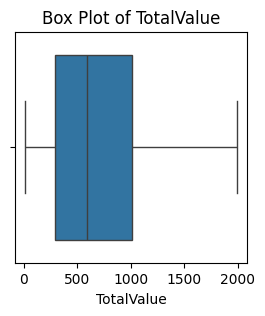

Price: 0 outliers detected


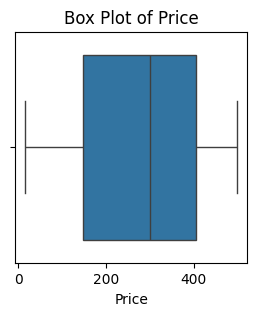

In [15]:
numeric_cols = ['Quantity', 'TotalValue', 'Price']
for col in numeric_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

    plt.figure(figsize=(3, 3))
    sns.boxplot(x=merged_df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [16]:
merged_df["TransactionDate"].min(), merged_df["TransactionDate"].max()

('2023-12-30 15:29:12', '2024-12-28 11:00:00')

### Business Insights

1. Top 5 most sold products in the time frame of approximately 1 year from Dec 2023 to Dec 2024

In [17]:
most_sold_products = merged_df.groupby("ProductName")["Quantity"].sum()
most_sold_products.sort_values(ascending=False, inplace=True)
most_sold_products = most_sold_products.head()

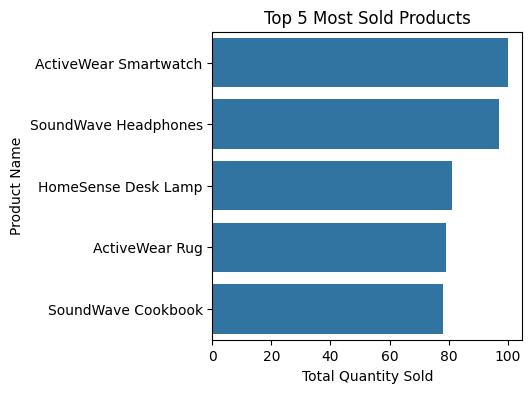

In [18]:
plt.figure(figsize=(4, 4))
sns.barplot(x=most_sold_products.values, y=most_sold_products.index)
plt.title("Top 5 Most Sold Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

2. Differences in Revenue across different Regions

In [ ]:
region_revenue = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_revenue

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

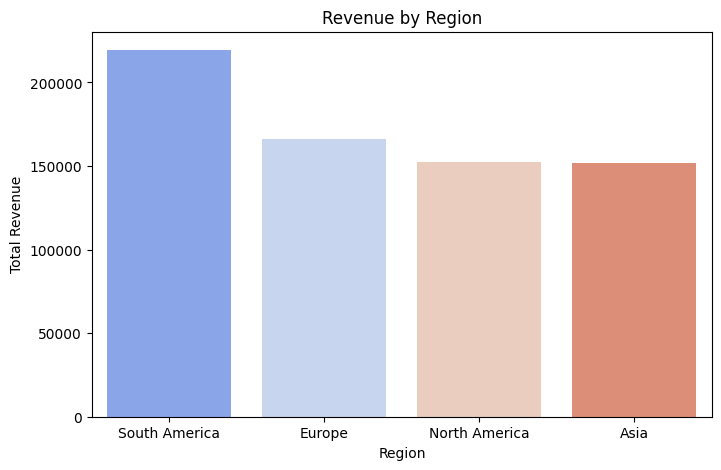

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="coolwarm", hue=region_revenue.index, legend=False)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

3. Monthly Revenue Generated

In [21]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period("M")
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,2024-10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,2024-06
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,2024-04
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,2024-09


In [22]:
monthly_sales = merged_df.groupby('Month')["TotalValue"].sum()
monthly_sales

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

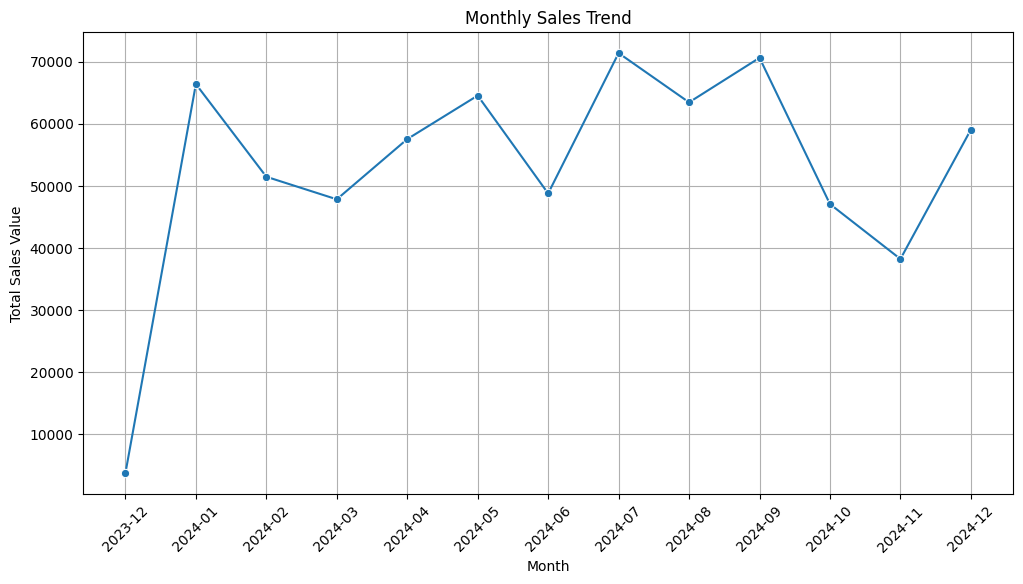

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Value")
plt.grid()
plt.show()


4. 10 Most Promising Customers in terms of total purchasing

In [24]:
customer_revenue = merged_df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
customer_revenue

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

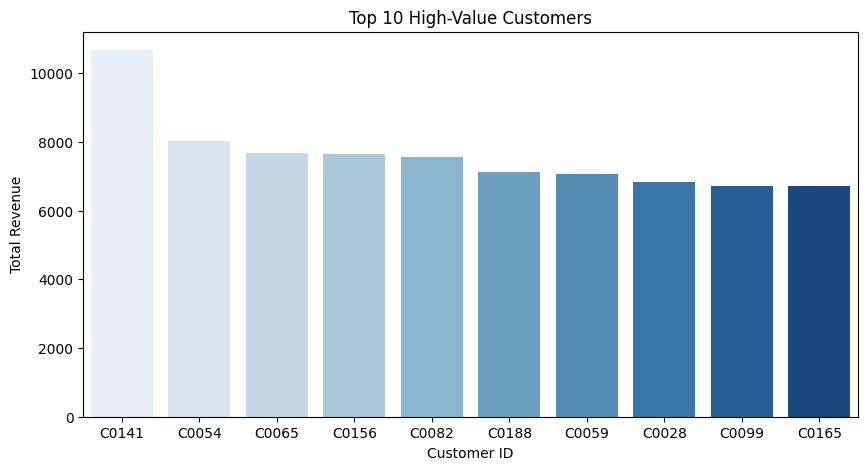

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_revenue.index, y=customer_revenue.values, palette="Blues", hue=customer_revenue.index, legend=False)
plt.title("Top 10 High-Value Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.show()

5. Variation in Prices of different products in One Year Time

In [26]:
price_variation = merged_df.groupby("ProductName")["Price"].std().sort_values(ascending=False).head(10)
price_variation

ProductName
SoundWave Smartwatch        229.167007
TechPro Novel               211.129213
TechPro Textbook            174.905000
SoundWave Cookbook          169.943472
TechPro T-Shirt             162.739403
ActiveWear Textbook         158.219409
ActiveWear Rug              149.836879
ActiveWear Running Shoes    149.510056
BookWorld Biography         136.784599
ActiveWear Jacket           128.199571
Name: Price, dtype: float64

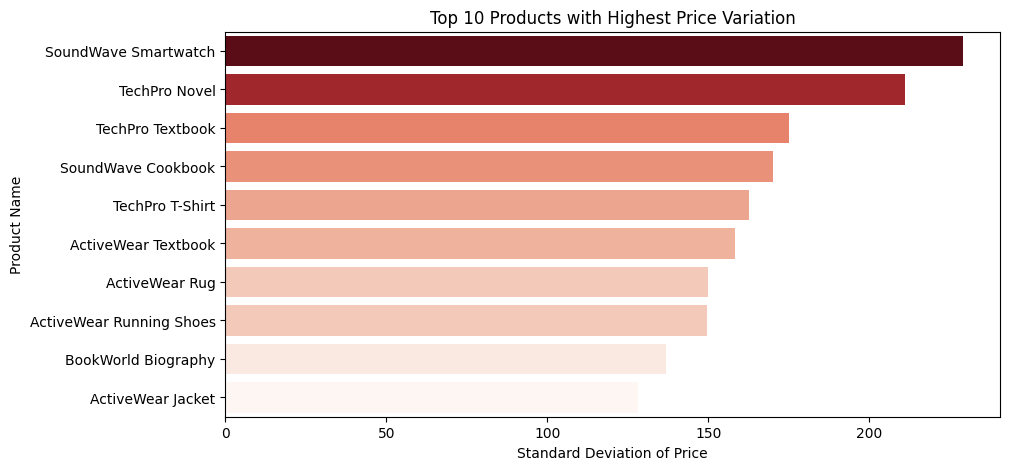

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=price_variation.values, y=price_variation.index, palette="Reds", hue=price_variation.values, legend=False)
plt.title("Top 10 Products with Highest Price Variation")
plt.xlabel("Standard Deviation of Price")
plt.ylabel("Product Name")
plt.show()